# User Wise Hybrid

In [1]:
from Utils.Toolkit import get_data

data = get_data()

URM = data['train'].tocsr()
ICM = data['ICM_subclass'].tocsr()

## Let's divide users intro groups

In [2]:
import numpy as np

group0 = []
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
group8 = []
group9 = []

for user_id in range(URM.shape[0]):
    start_pos = URM.indptr[user_id]
    end_pos = URM.indptr[user_id + 1]
    if len(URM.data[start_pos:end_pos]) == 0:
        group0.append(user_id)
    elif 0 < len(URM.data[start_pos:end_pos]) <= 2:
        group1.append(user_id)
    elif 2 < len(URM.data[start_pos:end_pos]) <= 5:
        group2.append(user_id)
    elif 5 < len(URM.data[start_pos:end_pos]) <= 10:
        group3.append(user_id)
    elif 10 < len(URM.data[start_pos:end_pos]) <= 20:
        group4.append(user_id)
    elif 20 < len(URM.data[start_pos:end_pos]) <= 30:
        group5.append(user_id)
    elif 40 < len(URM.data[start_pos:end_pos]) <= 60:
        group6.append(user_id)
    elif 60 < len(URM.data[start_pos:end_pos]) <= 100:
        group7.append(user_id)
    elif 100 < len(URM.data[start_pos:end_pos]) <= 300:
        group8.append(user_id)
    elif 300 < len(URM.data[start_pos:end_pos]) <= 10000:
        group9.append(user_id)

        
group0 = np.array(group0)
group1 = np.array(group1)
group2 = np.array(group2)
group3 = np.array(group3)
group4 = np.array(group4)
group5 = np.array(group5)
group6 = np.array(group6)
group7 = np.array(group7)
group8 = np.array(group8)
group9 = np.array(group9)

group = np.array([group0, group1, group2, group3, group4, group5, group6, group7, group8, group9])

In [3]:
print(str(len(group0)) + " Cold users")
print(len(group1))
print(len(group2))
print(len(group3))
print(len(group4))
print(len(group5))
print(len(group6))
print(len(group7))
print(len(group8))
print(len(group9))

print(type(group))

6473 Cold users
3695
4556
5034
5443
2502
1183
530
131
5
<class 'numpy.ndarray'>


In [4]:
from Recommenders.CF.FeatureBoostedItemCollaborative import FeatureBoostedItemCollaborativeFiltering
from Recommenders.CF.item_cf import ItemBasedCollaborativeFiltering
from Recommenders.CF.user_cf import UserBasedCollaborativeFiltering
from Recommenders.NonPersonalized.top_pop import TopPop
from Recommenders.CBF.user_CBF import UserContentBasedRecommender
from Recommenders.SLIM.SLIM_BPR_Cython import SLIM_BPR_Cython

MAPs_FBICF = []
MAPs_ICF = []
MAPs_UCBF = []
MAPs_UCF = []
MAPs_top = []
MAPs_slim = []

FBICF = FeatureBoostedItemCollaborativeFiltering(31, 5)
FBICF.fit(URM.copy(), ICM)

itemCF = ItemBasedCollaborativeFiltering(29, 5)
itemCF.fit(URM.copy())

userCBF = UserContentBasedRecommender(1000, 500)
userCBF.fit(URM.copy(), data['UCM'])

userCF = UserBasedCollaborativeFiltering(94, 19)
userCF.fit(URM.copy())

topPop = TopPop()
topPop.fit(URM.copy())

slim = SLIM_BPR_Cython(epochs=4000,
                               topK=55,
                               lambda_i=0.1,
                               lambda_j=1,
                               positive_threshold=1,
                               sgd_mode="adam",
                               symmetric=True,
                               learning_rate=1e-4)
slim.fit(URM.copy())

for group_id in range(len(group)):
    result = FBICF.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_FBICF.append(result['MAP'])
    
    result = itemCF.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_ICF.append(result['MAP'])
    
    result = userCBF.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_UCBF.append(result['MAP'])
    
    result = userCF.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_UCF.append(result['MAP'])
    
    result = topPop.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_top.append(result['MAP'])
    
    result = slim.evaluate_MAP_target(data['test'], group[group_id])
    MAPs_slim.append(result['MAP'])

Evaluating SM_user_feature_matrix: 100%|██████████| 30911/30911 [00:09<00:00, 3346.12it/s]


Generated UFM with shape (30911, 2011)


Evaluating MAP with target:   5%|▍         | 318/6473 [00:00<00:01, 3175.94it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2813	Relevant=4


Evaluating MAP with target:   6%|▋         | 412/6473 [00:00<00:01, 4103.42it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2813	Relevant=4


Evaluating MAP with target:  11%|█         | 687/6473 [00:00<00:01, 3285.79it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2816	Relevant=1


Evaluating MAP with target:   6%|▌         | 383/6473 [00:00<00:03, 1928.20it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2813	Relevant=4


Evaluating MAP with target:   5%|▌         | 326/6473 [00:00<00:01, 3244.55it/s]

BaseRecommender -> MAP: 0.0010 with TopK = 0 & Shrink = 0	TOTAL MISS=2727	Relevant=90


Evaluating MAP with target:   7%|▋         | 262/3695 [00:00<00:02, 1308.70it/s]

BaseRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2813	Relevant=4


Evaluating MAP with target:   4%|▍         | 139/3695 [00:00<00:02, 1383.43it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0065 with TopK = 0 & Shrink = 0	TOTAL MISS=3388	Relevant=307


Evaluating MAP with target:  10%|▉         | 357/3695 [00:00<00:01, 1784.43it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0065 with TopK = 0 & Shrink = 0	TOTAL MISS=3388	Relevant=307


Evaluating MAP with target:   6%|▋         | 231/3695 [00:00<00:03, 1153.45it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=3693	Relevant=2


Evaluating MAP with target:   2%|▏         | 82/3695 [00:00<00:04, 819.51it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0063 with TopK = 0 & Shrink = 0	TOTAL MISS=3341	Relevant=354


Evaluating MAP with target:   3%|▎         | 122/3695 [00:00<00:02, 1212.30it/s]

BaseRecommender -> MAP: 0.0009 with TopK = 0 & Shrink = 0	TOTAL MISS=3597	Relevant=98


Evaluating MAP with target:   0%|          | 3/4556 [00:00<03:05, 24.53it/s]

BaseRecommender -> MAP: 0.0060 with TopK = 0 & Shrink = 0	TOTAL MISS=3374	Relevant=321


Evaluating MAP with target:   3%|▎         | 132/4556 [00:00<00:03, 1316.25it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0076 with TopK = 0 & Shrink = 0	TOTAL MISS=4189	Relevant=367


Evaluating MAP with target:   4%|▍         | 180/4556 [00:00<00:02, 1797.59it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0087 with TopK = 0 & Shrink = 0	TOTAL MISS=4088	Relevant=468


Evaluating MAP with target:   5%|▍         | 226/4556 [00:00<00:03, 1119.98it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=4552	Relevant=4


Evaluating MAP with target:   2%|▏         | 76/4556 [00:00<00:05, 759.54it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0063 with TopK = 0 & Shrink = 0	TOTAL MISS=4188	Relevant=368


Evaluating MAP with target:   6%|▌         | 263/4556 [00:00<00:03, 1315.86it/s]

BaseRecommender -> MAP: 0.0011 with TopK = 0 & Shrink = 0	TOTAL MISS=4448	Relevant=108


Evaluating MAP with target:   0%|          | 3/5034 [00:00<03:31, 23.78it/s]

BaseRecommender -> MAP: 0.0075 with TopK = 0 & Shrink = 0	TOTAL MISS=4133	Relevant=423


Evaluating MAP with target:   2%|▏         | 122/5034 [00:00<00:04, 1219.45it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0090 with TopK = 0 & Shrink = 0	TOTAL MISS=4540	Relevant=494


Evaluating MAP with target:   4%|▎         | 178/5034 [00:00<00:02, 1779.57it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0098 with TopK = 0 & Shrink = 0	TOTAL MISS=4459	Relevant=575


Evaluating MAP with target:   4%|▍         | 220/5034 [00:00<00:04, 1090.02it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5034	Relevant=0


Evaluating MAP with target:   2%|▏         | 78/5034 [00:00<00:06, 772.36it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0051 with TopK = 0 & Shrink = 0	TOTAL MISS=4749	Relevant=285


Evaluating MAP with target:   2%|▏         | 118/5034 [00:00<00:04, 1172.99it/s]

BaseRecommender -> MAP: 0.0012 with TopK = 0 & Shrink = 0	TOTAL MISS=4903	Relevant=131


Evaluating MAP with target:   0%|          | 3/5443 [00:00<04:01, 22.50it/s]

BaseRecommender -> MAP: 0.0086 with TopK = 0 & Shrink = 0	TOTAL MISS=4543	Relevant=491


Evaluating MAP with target:   2%|▏         | 110/5443 [00:00<00:04, 1098.58it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0092 with TopK = 0 & Shrink = 0	TOTAL MISS=4901	Relevant=542


Evaluating MAP with target:   7%|▋         | 365/5443 [00:00<00:02, 1819.41it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0094 with TopK = 0 & Shrink = 0	TOTAL MISS=4857	Relevant=586


Evaluating MAP with target:   2%|▏         | 106/5443 [00:00<00:05, 1057.92it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5443	Relevant=0


Evaluating MAP with target:   1%|          | 68/5443 [00:00<00:07, 672.16it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0026 with TopK = 0 & Shrink = 0	TOTAL MISS=5296	Relevant=147


Evaluating MAP with target:   2%|▏         | 113/5443 [00:00<00:04, 1120.90it/s]

BaseRecommender -> MAP: 0.0009 with TopK = 0 & Shrink = 0	TOTAL MISS=5335	Relevant=108


Evaluating MAP with target:   0%|          | 3/2502 [00:00<01:39, 25.07it/s]

BaseRecommender -> MAP: 0.0078 with TopK = 0 & Shrink = 0	TOTAL MISS=4985	Relevant=458


Evaluating MAP with target:   4%|▎         | 93/2502 [00:00<00:02, 929.40it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0034 with TopK = 0 & Shrink = 0	TOTAL MISS=2275	Relevant=227


Evaluating MAP with target:   7%|▋         | 172/2502 [00:00<00:01, 1718.08it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0034 with TopK = 0 & Shrink = 0	TOTAL MISS=2265	Relevant=237


Evaluating MAP with target:   4%|▍         | 98/2502 [00:00<00:02, 975.81it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=2502	Relevant=0


Evaluating MAP with target:   5%|▌         | 127/2502 [00:00<00:03, 636.34it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0005 with TopK = 0 & Shrink = 0	TOTAL MISS=2466	Relevant=36


Evaluating MAP with target:   4%|▍         | 94/2502 [00:00<00:02, 936.99it/s]

BaseRecommender -> MAP: 0.0004 with TopK = 0 & Shrink = 0	TOTAL MISS=2461	Relevant=41


Evaluating MAP with target:   0%|          | 3/1183 [00:00<00:45, 26.05it/s]

BaseRecommender -> MAP: 0.0028 with TopK = 0 & Shrink = 0	TOTAL MISS=2307	Relevant=195


Evaluating MAP with target:   7%|▋         | 77/1183 [00:00<00:01, 768.89it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0012 with TopK = 0 & Shrink = 0	TOTAL MISS=1103	Relevant=80


Evaluating MAP with target:  15%|█▍        | 175/1183 [00:00<00:00, 1747.87it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0012 with TopK = 0 & Shrink = 0	TOTAL MISS=1102	Relevant=81


Evaluating MAP with target:  12%|█▏        | 139/1183 [00:00<00:01, 691.99it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=1183	Relevant=0


Evaluating MAP with target:   4%|▎         | 42/1183 [00:00<00:02, 410.40it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0001 with TopK = 0 & Shrink = 0	TOTAL MISS=1171	Relevant=12


Evaluating MAP with target:   5%|▌         | 64/1183 [00:00<00:01, 632.55it/s]

BaseRecommender -> MAP: 0.0003 with TopK = 0 & Shrink = 0	TOTAL MISS=1161	Relevant=22


Evaluating MAP with target:   1%|          | 3/530 [00:00<00:18, 28.91it/s]

BaseRecommender -> MAP: 0.0010 with TopK = 0 & Shrink = 0	TOTAL MISS=1111	Relevant=72


Evaluating MAP with target:  15%|█▍        | 77/530 [00:00<00:00, 761.37it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0006 with TopK = 0 & Shrink = 0	TOTAL MISS=488	Relevant=42


Evaluating MAP with target:  31%|███▏      | 166/530 [00:00<00:00, 1647.97it/s]

ItemBasedCollaborativeFiltering -> MAP: 0.0006 with TopK = 0 & Shrink = 0	TOTAL MISS=490	Relevant=40


Evaluating MAP with target:  28%|██▊       | 146/530 [00:00<00:00, 722.36it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=530	Relevant=0


Evaluating MAP with target:  16%|█▌        | 84/530 [00:00<00:01, 420.98it/s]

UserBasedCollaborativeFiltering -> MAP: 0.0001 with TopK = 0 & Shrink = 0	TOTAL MISS=526	Relevant=4


Evaluating MAP with target:  24%|██▍       | 128/530 [00:00<00:00, 640.42it/s]

BaseRecommender -> MAP: 0.0001 with TopK = 0 & Shrink = 0	TOTAL MISS=524	Relevant=6


Evaluating MAP with target:   3%|▎         | 4/131 [00:00<00:04, 31.07it/s]

BaseRecommender -> MAP: 0.0003 with TopK = 0 & Shrink = 0	TOTAL MISS=508	Relevant=22


Evaluating MAP with target:   0%|          | 0/131 [00:00<?, ?it/s]

FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=124	Relevant=7
ItemBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=124	Relevant=7


Evaluating MAP with target:   0%|          | 0/131 [00:00<?, ?it/s]

UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=131	Relevant=0
UserBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=130	Relevant=1


Evaluating MAP with target:  45%|████▌     | 59/131 [00:00<00:00, 583.10it/s]

BaseRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=130	Relevant=1


Evaluating MAP with target: 100%|██████████| 5/5 [00:00<00:00, 440.88it/s]

BaseRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=128	Relevant=3
FeatureBoostedItemCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0
ItemBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0
UserContentBasedRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0
UserBasedCollaborativeFiltering -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0
BaseRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0
BaseRecommender -> MAP: 0.0000 with TopK = 0 & Shrink = 0	TOTAL MISS=5	Relevant=0


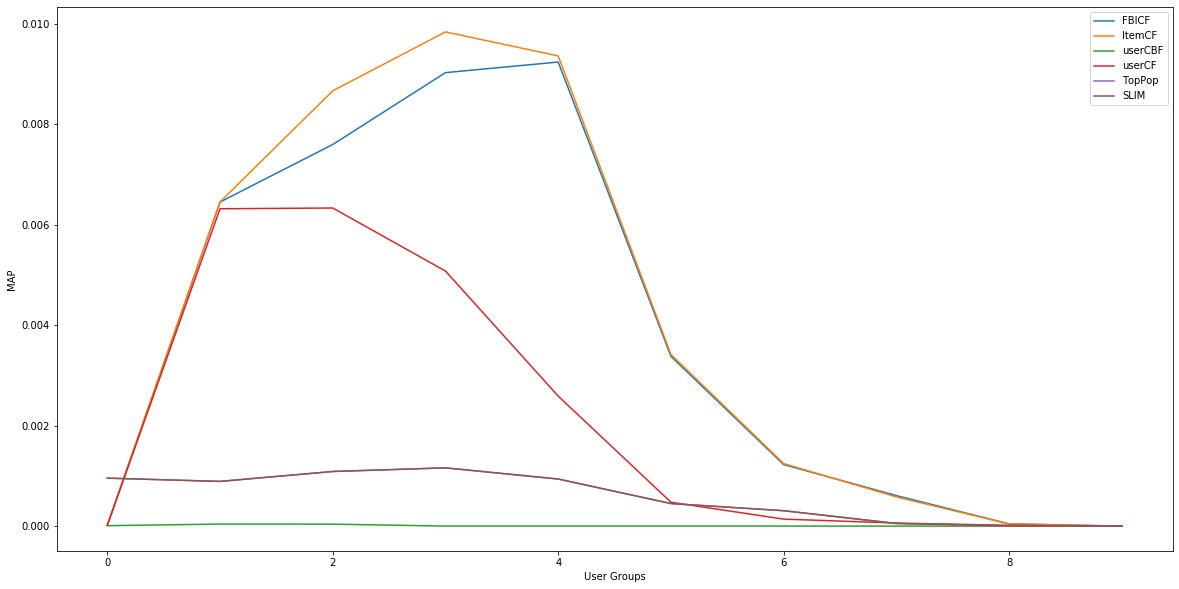

In [7]:
import matplotlib.pyplot as pyplot
%matplotlib inline  

pyplot.figure(figsize=(20,10))
pyplot.plot(MAPs_FBICF, label="FBICF")
pyplot.plot(MAPs_ICF, label="ItemCF")
pyplot.plot(MAPs_UCBF, label="userCBF")
pyplot.plot(MAPs_UCF, label="userCF")
pyplot.plot(MAPs_top, label="TopPop")
pyplot.plot(MAPs_top, label="SLIM")
pyplot.ylabel('MAP')
pyplot.xlabel('User Groups')
pyplot.legend()
pyplot.show()